# The Layer
Instead of iterating over all of the inputs we can treat the inputs and the weights as vectors and use a dot product. That is the same as multiplying the elements one by one and summing up the results.

In [5]:
import numpy as np

class Neuron:
    def __init__(self, number_of_inputs):
        self.weights = np.random.uniform(-1, 1, size=number_of_inputs)
        self.bias = np.random.uniform(-1, 1)
        
    def predict(self, inputs):
        return self.weights.dot(inputs) + self.bias
    
neuron = Neuron(5)

neuron.predict(np.array([4, 9, 11, 12, 25]))

5.808883987593707

Now the only thing our neuron stores is a weight vector and a bias value. So if we have a list of neuron that all do the same thing we can store all of their weights as a matrix and all of their biases as vector. In other words all the neurons have 1 connection per input and a single output. They don't have connections to each other only to the inputs. 

In [6]:
num_inputs = 10
num_neurons = 5


class Layer:
    def __init__(self, num_inputs, num_neurons):
        # we now have 1 row per neuron and 1 column per weight
        self.weights = np.random.uniform(-1, 1, size=(num_neurons, num_inputs))

        # we also randomly create a bias for each neuron
        self.biases = np.random.uniform(-1, 1, size=num_neurons)
    
    def predict(self, inputs):
        return self.weights.dot(inputs) + self.biases

        
layer = Layer(num_inputs, num_neurons)

# now we have 1 output per neuron in our layer
layer.predict(np.array([5, 1, 2, 11, 20, 15, 3, 18, 92, 10]))


array([-22.24100359,  94.87863578, -67.07239799, -28.29942473,
        70.58439759])

## Layer Activation

We can also add an activation function to our layer. In That case, the output from each neuron in the layer is passed into the activation function individually. However, there is a case where we use all of the outputs of the layer as the input to the activation function.

The softmax activation function takes in all layer outputs at once. Why is it called softmax, well it basically turns all the outputs into a value between 0 and 1. However, unlike the sigmoid activation function, the value of an output is a ratio of the total sum output. In other words we sum up all the outputs and divide each neuron value by the total. This is basically telling us which neuron had the max value (i.e. softmax). For instance if we have 4 output neurons and their output values were 10, 5, 75, 10 the third neuron is obviously the max and their converted softmax values would be .1, .05, .75, .1 . You can see that no neuron can ever be greater than 1 or less than 0. Also, if we're doing a classification the 4 values could represent types of houses ranch, townhouse, duplex, standalone. If a house can only belong to one class the for softmax we would want the value of that class to be 1 and all the rest to be 0. For instance if the house were a townhouse, we would want the layer to output 0, 1, 0, 0. This basically means the network is 100% sure the house is a townhouse.

There is one extra step we need for softmax however and that is to use each neuron value as an exponent. The reason for this is to make negative values positive. If the output of softmax is supposed to represent probabilities we can't have them negative. Therefore, instead of summing up all neuron output, we sum up each output as an exponential. We also use the neuron output as an exponential to get the final ratio. That's a lot of jargon so it may be more helpful to look at the code.

In [7]:
from math import exp

def sigmoid(z):
    return 1.0/(1.0 + exp(-z))

class SigmoidLayer:
    def __init__(self, num_inputs, num_neurons):
        # we now have 1 row per neuron and 1 column per weight
        self.weights = np.random.uniform(-1, 1, size=(num_neurons, num_inputs))

        # we also randomly create a bias for each neuron
        self.biases = np.random.uniform(-1, 1, size=num_neurons)
    
    def predict(self, inputs):
        weighted_input = self.weights.dot(inputs) + self.biases
        
        # now we simply pass each output value into the activation function
        return [sigmoid(z) for z in weighted_input]


class SoftmaxLayer:
    def __init__(self, num_inputs, num_neurons):
        self.weights = np.random.uniform(-1, 1, size=(num_neurons, num_inputs))
        self.biases = np.random.uniform(-1, 1, size=num_neurons)
    
    def predict(self, inputs):
        weighted_input = self.weights.dot(inputs) + self.biases
        
        # this is where we take each value z and convert it to e^(z)
        # so that all values are positive
        weighted_input_exp = [exp(z) for z in weighted_input]
        
        # now we take the total of our exponential values
        total = sum(weighted_input_exp)
        
        # here you can see that when we divide to get the final probability 
        # we also use the exponential. This makes all our outputs add up to 1
        # so that the represent probabilities
        return [exp(z)/total for z in weighted_input]
    
num_inputs, num_neurons = (10, 4)

layer = SigmoidLayer(num_inputs, num_neurons)
smLayer = SoftmaxLayer(num_inputs, num_neurons)


layer_input = np.array([5, 1, 2, 11, 20, 15, 3, 18, 92, 10])

# All outputs from the sigmoid layer are between 0 and 1. 
# However, when we sum them up they may come out to be much greater than 1
print('sigmoid layer: {}'.format(layer.predict(layer_input)))

# Compare sigmoid to softmax. Here all outputs are guaranteed to sum to 1
# This is what we would expect for probabilities of something happening.
print('softmax layer: {}'.format(smLayer.predict(layer_input)))

sigmoid layer: [1.0, 0.8375247559137654, 1.0, 1.0]
softmax layer: [1.1191390335066746e-13, 2.539919710378433e-34, 0.9999999999998881, 3.992894505348539e-24]


## Going Deep

We can chain multiple layers together as long as the number of outputs from a previous layer matches the number of inputs to the next. This is what real neural networks look like. Some have dozens or even hundreds of layers.

Here we can make the final layer softmax so that our outputs represent a class that the network "thinks" the input belongs to. However, we are not limited in the output of our hidden layers. They can have sigmoid, linear, relu, or any other output we want.

===== input "image" =====


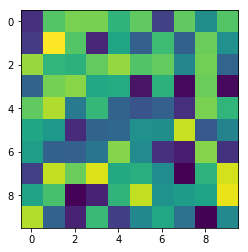


 === Get the max probability === 
 I think the image is "number"


In [8]:
import matplotlib.pyplot as plt

# this is a 10X10 matrix of 100 values that represents our "image"
# which could be a letter, a number, or punctuation
image_width = 10
num_inputs = image_width*image_width

# there are 10 neurons in the first layer
num_neurons_l1 = 10

# there are 5 neurons in the second layer
num_neurons_l2 = 5

# there are 3 outputs of our softmax layer
# representing 3 image classes. Let's say the 
# classes are letter, number, punctuation
num_outputs = 3

layer1 = Layer(num_inputs, num_neurons_l1)
layer2 = SigmoidLayer(num_neurons_l1, num_neurons_l2)
layer3 = SoftmaxLayer(num_neurons_l2, num_outputs)

# lets say these are pixel values that make a 
# 10X10 = 100 pixel grayscale image. The value
# of each pixel can be between 0 and 1
network_input = np.random.uniform(0, 1, size=(image_width, image_width))


# now we chain the inputs and outputs together to get the final result
# for the network input we have to flatten it from a 10X10 matrix to a 
# vector of length 100
output_l1 = layer1.predict(network_input.flatten())

output_l2 = layer2.predict(output_l1)

final_output = layer3.predict(output_l2)

print('===== input "image" =====')

# show our "image"
plt.imshow(network_input, shape=(10, 10))
plt.show()

classes = ['letter', 'number', 'punctuation']
# get index of max value

class_idx = final_output.index(max(final_output))

print('\n === Get the max probability === \n I think the image is "{}"'.format(classes[class_idx]))

## We just made a neural network that classifies images!!!!

It's not very good because it hasn't learned anything and it's just taking in random noise images. BUT WE HAVE A WORKING NEURAL NETWORK